# Eigen Faces
---------------------------
Mátematicas para el aprendizaje de máquina

Paulina Castillo

30 de mayo de 2023

--------------------------


## Introducción

El reconocimiento facial ha emergido como una de las tecnologías más prometedoras y controvertidas en el ámbito de la inteligencia artificial. Esta innovación ha generado un amplio debate debido a sus implicaciones éticas, de privacidad y seguridad. Sin embargo, es indudable que el reconocimiento facial posee un potencial revolucionario y desempeña un papel crucial en la sociedad actual. Esto debido a su uso en bancos, aeropuertos e incluso entidades estatales.


Dentro del desarrollo del reconocimiento facial el uso de matemática es crucial, motivo por el cual es necesario su análisis desde un punto de vista teórico. Por eso en este documento veremos su planteamiento; particularizando la discución hecha por los profesores Steven Brunton y Nathan Kutz
 de la Universidad de Washington.


## Desarrollo

### Descomposición en valores singulares

Sea $X_{n,m} $  una matriz de valores reales. Podemos descomponerla como se sigue:

$$ X = U \Sigma V^{T} $$

Donde $U$ y $V$ son matrices cuadradas de tamaño $n,m$ respectivamente con la propiedad que son unitarias, es decir 

$$U^T \cdot U = U \cdot U^T = I$$
$$V^T \cdot V = V \cdot V^T = I$$

y donde $\Sigma_{n,m}$ es una matriz diagonal con valores no negativos en su diagonal principal y 0 en el resto de entradas. 

 Para los siguientes calculos se supone $n>m$ 

En [1] se menciona la posibilidad de descomponer la matriz $X$ equivalentemente dada la forma de $\Sigma$ 

$$
\mathbf{X}=\mathbf{U} \Sigma \mathbf{V}^T=\left[\begin{array}{ll}
\hat{\mathbf{U}} & \hat{\mathbf{U}}^{\perp}
\end{array}\right]\left[\begin{array}{c}
\hat{\Sigma} \\
0
\end{array}\right] \mathbf{V}^T=\hat{\mathbf{U}} \hat{\Sigma} \mathbf{V}^T
$$


Además de esto, es posible hacer una aproximación con fin de restar peso al computo, esto fue probado por Eckart-Young y su prueba puede verse en [1]. 

$$
\mathbf{X} \approx \tilde{\mathbf{U}} \tilde{\mathbf{\Sigma}} \tilde{\mathbf{V}}^T
$$

Donde $\tilde{\mathbf{U}} = U_r$, $\tilde{\mathbf{V}} = V_r$ corresponden a las matrices con las $r$ primeras columnas.  

Consideremos los siguientes cálculos: 

$$
\begin{aligned}
\mathbf{X X}^T & =\mathbf{U}
\hat{\Sigma}  \mathbf{V}^T \mathbf{V}
\hat{\Sigma}  \mathbf{U}^T=\mathbf{U}
\hat{\Sigma}^2 \mathbf{U}^T \\

\mathbf{X}^T \mathbf{X} & =\mathbf{V}
\hat{\Sigma} \mathbf{U}^T \mathbf{U}
\hat{\Sigma}  \mathbf{V}^T=\mathbf{V} \hat{\Sigma}^2 \mathbf{V}^T
\end{aligned}
$$

Lo cual es equivalente a  

$$
\begin{aligned}
\mathbf{X X}^T U& =\mathbf{U}
\hat{\Sigma}^2 \\

\mathbf{X}^T \mathbf{X} V& =\mathbf{V} \hat{\Sigma}^2 
\end{aligned}
$$

Lo que implica que $V$ y $U$ son los vectores propios de la matriz de covarianza de $X$ y su transpuesta respectivamente y $\Sigma ^2$ los valores propios de la matriz de covarianza de $X$ 


De modo, si se quiere aproximar un valor $x$ fuera de la imagen  de $X$ se usa la matriz $\hat{\mathbf{U}}$ para proyección. Esto se puede describir de la forma: 

$$\hat{x} = \hat{\mathbf{U}}\hat{\mathbf{U}}^Tx = \sum_{i} \frac{{\mathbf{x} \cdot \mathbf{u}_i}}{{\|\mathbf{u}_i\|^2}} \mathbf{u}_i = \sum_{i} {\mathbf{x} \cdot \mathbf{u}_i}\mathbf{u}_i = \sum_{i} \alpha _i \mathbf{u}_i $$

Donde $u_i$ representa la $i$-ésima columna de la matriz $\hat{\mathbf{U}}$ y $\alpha _i = \mathbf{x} \cdot \mathbf{u}_i $, siendo este último los coeficientes o factores de la combinación lineal de la proyección del elemento $x$.

## Implementación

### Definición de las matrices

Como se mencionó en el desarrollo, $X$ es una matriz de tamaño $n,m$. En este caso se utilizó la base de datos de [1], la cual se encuentra en el siguiente [link](http://databookuw.com/). En esta base de datos se trabaja con 38 personas, las cuales poseen, en promedio, 64 fotos cada una con diferentes luces. A continuación veremos los primeros 36 rostros con una luz frontal:

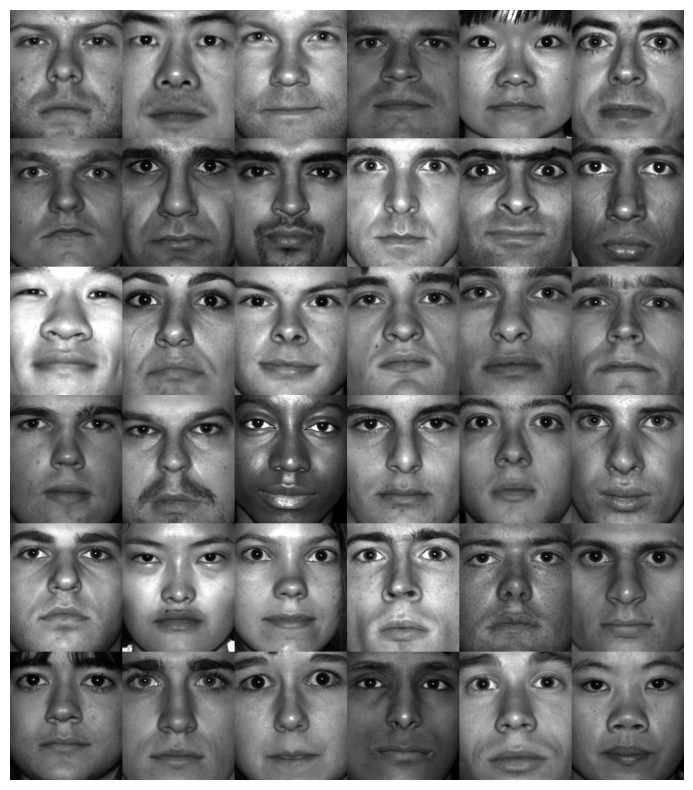

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

# tamaño de foto y letra
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

# información de la base de datos
mat_contents = scipy.io.loadmat(os.path.join('allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

#lienzo
allPersons = np.zeros((n*6,m*6))
count = 0

# agregar cada rostro al lienzo
for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

# ploteado   
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Veamos un ejemplo de las 64 fotos asignadas a la persona 0:

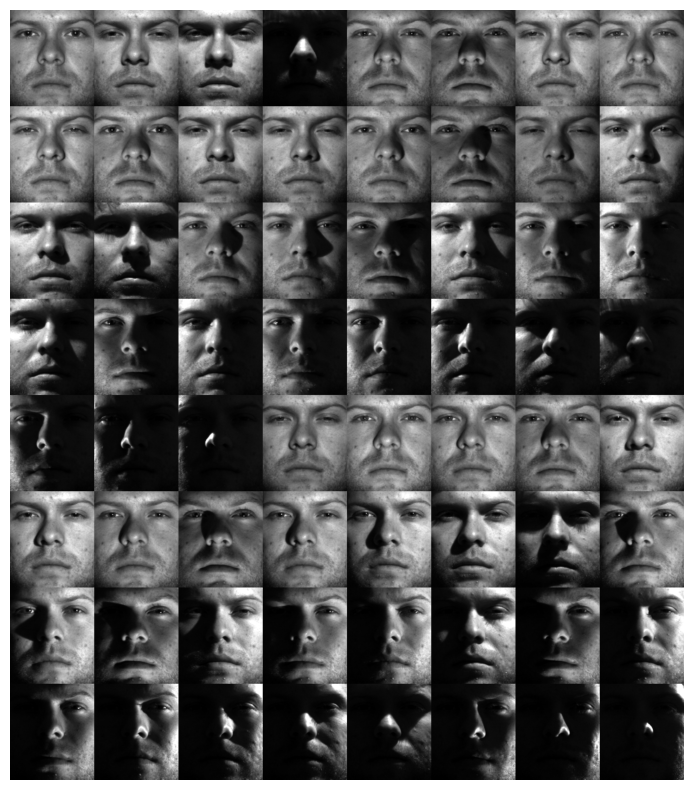

In [6]:
person = 0
subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
allFaces = np.zeros((n*8,m*8))
    
count = 0
    
for j in range(8):
    for k in range(8):
        if count < nfaces[person]:
            allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
            count += 1
                
img = plt.imshow(allFaces)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Cada una de estas caras será descrita como un vector. Estas fotografías tienen tamaño de $168 \times 192$ pixels, es decir el vector tendrá $168 \times 192 = 32256$ componentes.

La matriz $X$ se conformará de las primeras $37$ personas con cada una de sus $64$ fotos que serán vectores de tamaño $32256 \times 1$.


El cálculo de la descomposición será hecho a traves de la librería Numpy la cual a traves de linalg se aplicará la función svd, lo cual nos generará las matrices $U,\Sigma $ y $ V$ correspondientes

### Entreno del algoritmo

In [28]:

# importe de librerías
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from PIL import Image



In [10]:
# importe de la base de datos
mat_contents = scipy.io.loadmat(os.path.join('allFaces.mat'))


# Caras usadas
number_faces = 37

# Extracción información base de datos
# # los vectores propios
faces = mat_contents['faces']

# # tamaño de largo de las imagenes
m = int(mat_contents['m'])

# # tamaño de ancho de las imagenes
n = int(mat_contents['n'])

# número de imagenes por cada rostro
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# caras para el entreno del algoritmo 
trainingFaces = faces[:,:np.sum(nfaces[:number_faces])]


In [11]:

# Planteamiento descomposición valores singulares
X = trainingFaces
U, S, VT = np.linalg.svd(X,full_matrices=0)


#### Miselania de funciones

In [14]:
def plotMainEigenfaces(eigenList):
    matrix = U.T
    res, axs= plt.subplots(1, 10,  figsize=(30, 30))

    for i in range(len(eigenList)):
        ax = axs[i] 
        ax.imshow(np.reshape(matrix[eigenList[i]],(m,n)).T)
        ax.set_title(f'Face # {eigenList[i]}', fontsize=30)
        ax.axis('off')

### Testeo con nuevas imagenes

Se importa la nueva imagen y se convierte a un arreglo de numpy.

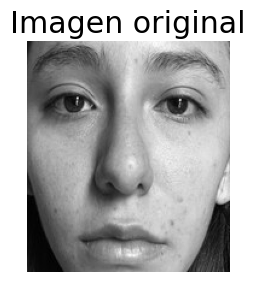

In [23]:
imagen_pao = Image.open('paulina_face.jpeg')
numpydata_pao = np.asarray(imagen_pao)

plt.rcParams["figure.figsize"] = [3, 3]
plt.imshow(imagen_pao)
plt.set_cmap('gray')
plt.title('Imagen original')
plt.axis('off')
plt.show()


Ahora haremos truncamientos con diferentes valores de $r$

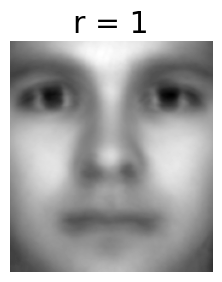

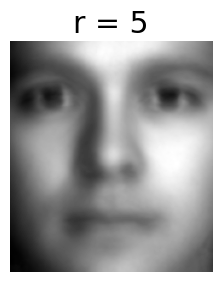

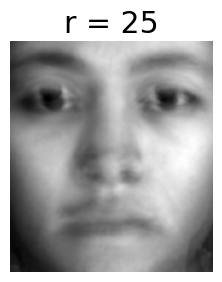

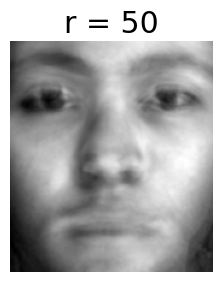

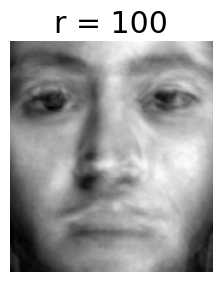

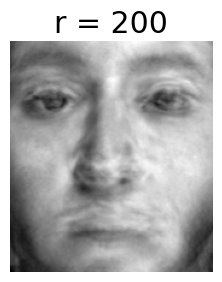

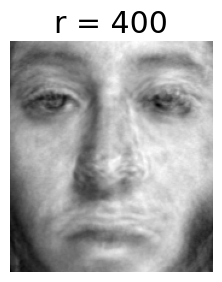

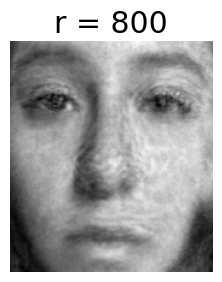

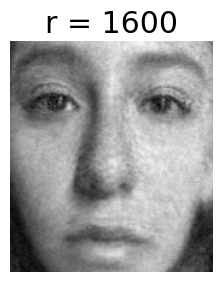

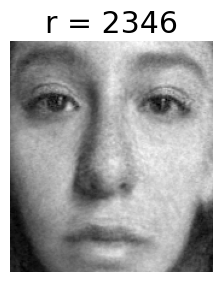

In [32]:
# aplanar la imagen para que sea un solo vector
img_plana_pao =  np.ndarray.flatten(numpydata_pao.T)

# decidimos donde truncar 
numero_total_caras = np.sum(nfaces[:number_faces])
r_list = [1,5,25,50,100,200,400,800,1600,numero_total_caras]
 
for r in r_list:

    # definición de los coeficientes de la combinación lineal
    factors_pao = U[:,:r].T @ img_plana_pao
    reconFace_pao =  (U[:,:r]  @ factors_pao )
 
    # ploteo
    plt.rcParams["figure.figsize"] = [3, 3]
    img_plteo_pao = plt.imshow(np.reshape(reconFace_pao,(m,n)).T)
    img_plteo_pao.set_cmap('gray')
    plt.title(f'r = {str(r)}')
    plt.axis('off')
    plt.show()


Ahora veremos cuales son los eigenvector de $U$ qué más peso tienen en la combinación lineal 

In [17]:
podio = 10
top_valores_pao = sorted(range(len(factors_pao)), key=lambda i: (factors_pao[i]))[-podio:]

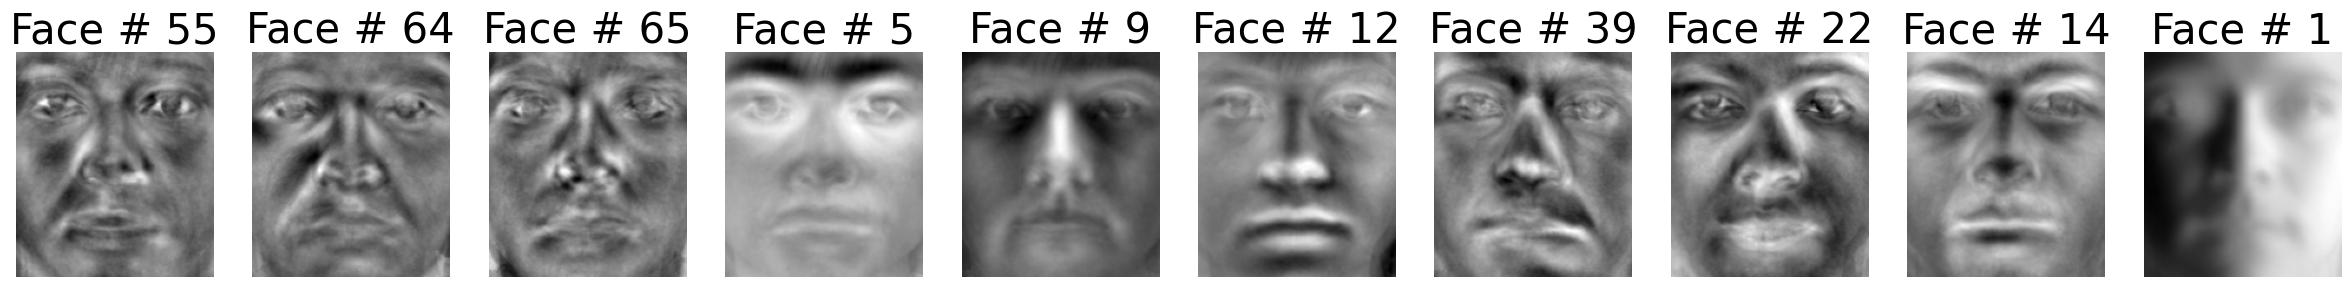

In [18]:
plotMainEigenfaces(top_valores_pao)

## Referencias


[1]  Brunton, S. y Kutz, N. (2017). Data Driven Science & Engineering
Machine Learning, Dynamical Systems, and Control. University of Washington. [data book uw](http://databookuw.com/databook.pdf)
